In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

## Loading in

In [3]:
df = pd.read_csv('pigmentation.tsv', sep='\t')
df.head()

,eggID,species,thick unpigmented,thick pigmented,diference between
0,12,arctic tern,258.0,252.0,6.0
1,19,arctic tern,180.0,162.0,18.0
2,21,arctic tern,218.0,200.0,18.0
3,22a,arctic tern,232.0,214.0,18.0
4,22b,arctic tern,226.0,212.0,14.0


## Renaming species to scientific name

In [4]:
name_mapping = {
    'arctic tern': 'Sterna paradisaea',
    'common gull': 'Larus canus',
    'lapwing': 'Vanellus vanellus',
    'oystercatcher': 'Haematopus ostralegus',
    'ringed plover': 'Charadrius hiaticula',  # Charadrius or Charadruis??
}

df['species'] = df['species'].apply(name_mapping.get)

## Running stats

In [5]:
df_stats = df.groupby('species')['pigment'].agg(['mean','std'])
df_stats

,mean,std
species,,
Charadrius hiaticula,15.238200,4.129660
Haematopus ostralegus,21.909417,5.292168
Larus canus,18.352407,8.378720
Sterna paradisaea,34.479364,7.753816
Vanellus vanellus,44.827167,12.364951


## Plotting

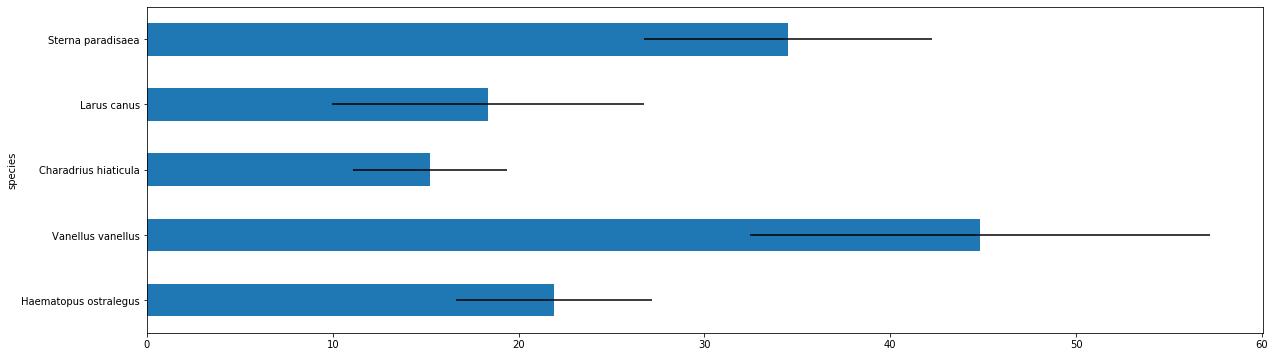

In [6]:
# re-ordering them so they are in the same order as the picture
order = ['Sterna paradisaea', 'Larus canus', 'Charadrius hiaticula', 'Vanellus vanellus', 'Haematopus ostralegus'][::-1]
df_stats = df_stats.reindex(order)

df_stats['mean'].plot.barh(xerr=df_stats['std'])

<img src="pylogeny tree.png" style="width: 600px;">

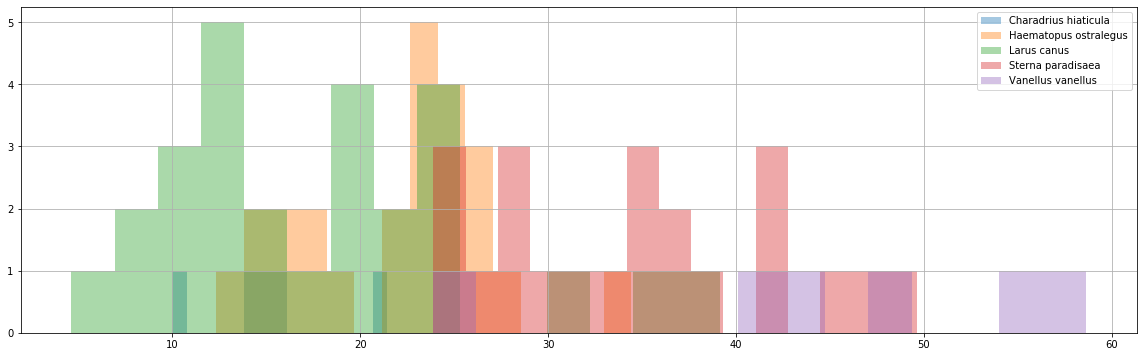

In [7]:
fig, ax = plt.subplots()
# fig.set_size_inches(25,8)

for s, sdf in df.groupby('species'):
    sdf['pigment'].hist(bins=15, ax=ax, alpha=0.4, label=s)

ax.legend()

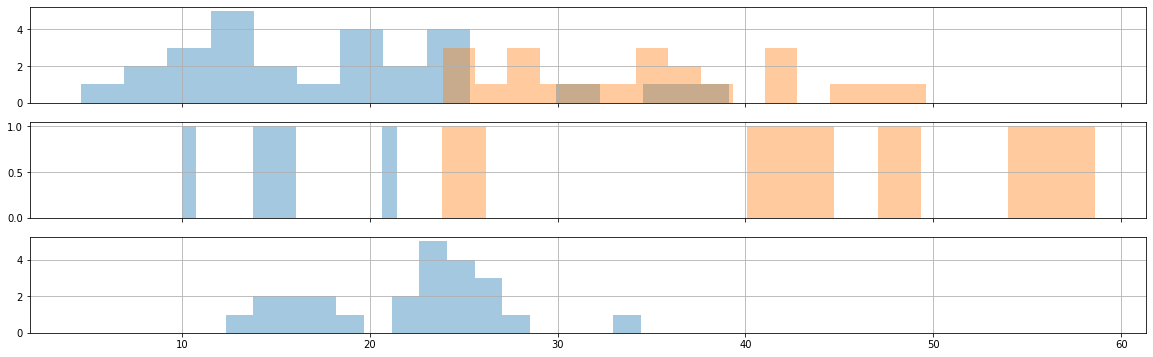

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)

for s, sdf in df.groupby('species'):
    if s in ['Sterna paradisaea', 'Larus canus']:
        ax_idx = 0
    elif s in ['Charadrius hiaticula', 'Vanellus vanellus']:
        ax_idx = 1
    else:
        ax_idx = 2
        
    sdf['pigment'].hist(bins=15, ax=axes[ax_idx], alpha=0.4, label=s)